In [1]:
import urllib.request
import numpy as np

## Part 1: A little visualization exercise ##

In [15]:
def load_data_from_url(url):
    response = urllib.request.urlopen(url)
    data = response.read().decode('utf-8')
    rows = [line.split('\t') for line in data.strip().split('\n')]
    np_data = np.array(rows, dtype=float)
    return np_data

In [16]:
# Write to CSV
# url = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv'
# file_path = 'data_1.tsv'
# with urllib.request.urlopen(url) as response, open(file_path, 'wb') as out_file:
#     data = response.read() 
#     out_file.write(data)  
# print(f"File downloaded and saved to {file_path}")

In [17]:
urls = [
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv',
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv',
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv',
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'
]
datasets = [load_data_from_url(url) for url in urls]
# datasets

In [18]:
data_1 = datasets[0]
data_2 = datasets[1]
data_3 = datasets[2]
data_4 = datasets[3]

In [19]:
def print_means(data, label):
    x_mean = np.mean(data[:, 0])
    y_mean = np.mean(data[:, 1])
    print(f"{label} - Mean of x-values: {x_mean:.2f}, Mean of y-values: {y_mean:.2f}")

# Calculating and printing means for each dataset
print_means(data_1, "Data 1")
print_means(data_2, "Data 2")
print_means(data_3, "Data 3")
print_means(data_4, "Data 4")

Data 1 - Mean of x-values: 9.00, Mean of y-values: 7.50
Data 2 - Mean of x-values: 9.00, Mean of y-values: 7.50
Data 3 - Mean of x-values: 9.00, Mean of y-values: 7.50
Data 4 - Mean of x-values: 9.00, Mean of y-values: 7.50


In [20]:
# ddof=1 for it calculates the sample variance rather than the population variance.
# ddof=0 for it calculates the population variance rather than the sample variance.
def print_variance(data, label):
    x_variance = np.var(data[:, 0], ddof=0)  
    y_variance = np.var(data[:, 1], ddof=0)  
    print(f"{label} - Variance of x-values: {x_variance:.3f}, Variance of y-values: {y_variance:.3f}")

print_variance(data_1, "Data 1")
print_variance(data_2, "Data 2")
print_variance(data_3, "Data 3")
print_variance(data_4, "Data 4")

Data 1 - Variance of x-values: 10.000, Variance of y-values: 3.752
Data 2 - Variance of x-values: 10.000, Variance of y-values: 3.752
Data 3 - Variance of x-values: 10.000, Variance of y-values: 3.748
Data 4 - Variance of x-values: 10.000, Variance of y-values: 3.748


In [21]:
cor = np.corrcoef(data_1[:, 0], data_1[:, 1])
cor

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [22]:
def print_pearson_correlation(data, label):
    correlation = np.corrcoef(data[:, 0], data[:, 1])[0, 1] 
    print(f"{label} - Pearson correlation coefficient between x and y: {correlation:.3f}")
# Calculating and printing Pearson correlation for each dataset
print_pearson_correlation(data_1, "Data 1")
print_pearson_correlation(data_2, "Data 2")
print_pearson_correlation(data_3, "Data 3")
print_pearson_correlation(data_4, "Data 4")

Data 1 - Pearson correlation coefficient between x and y: 0.816
Data 2 - Pearson correlation coefficient between x and y: 0.816
Data 3 - Pearson correlation coefficient between x and y: 0.816
Data 4 - Pearson correlation coefficient between x and y: 0.817


In [23]:
from scipy.stats import linregress
"""
a (slope of the fitted line),
b (intercept of the fitted line),
r_value (Pearson correlation coefficient),
p_value (two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero),
std_err (standard error of the gradient),
"""
def fit_and_print_line(data, label):
    slope, intercept, r_value, p_value, std_err = linregress(data[:, 0], data[:, 1])
    print(f"{label} - Line equation: f(x) = {slope:.2f}x + {intercept:.2f}")
fit_and_print_line(data_1, "Data 1")
fit_and_print_line(data_2, "Data 2")
fit_and_print_line(data_3, "Data 3")
fit_and_print_line(data_4, "Data 4")


Data 1 - Line equation: f(x) = 0.50x + 3.00
Data 2 - Line equation: f(x) = 0.50x + 3.00
Data 3 - Line equation: f(x) = 0.50x + 3.00
Data 4 - Line equation: f(x) = 0.50x + 3.00


In [24]:
import matplotlib.pyplot as plt

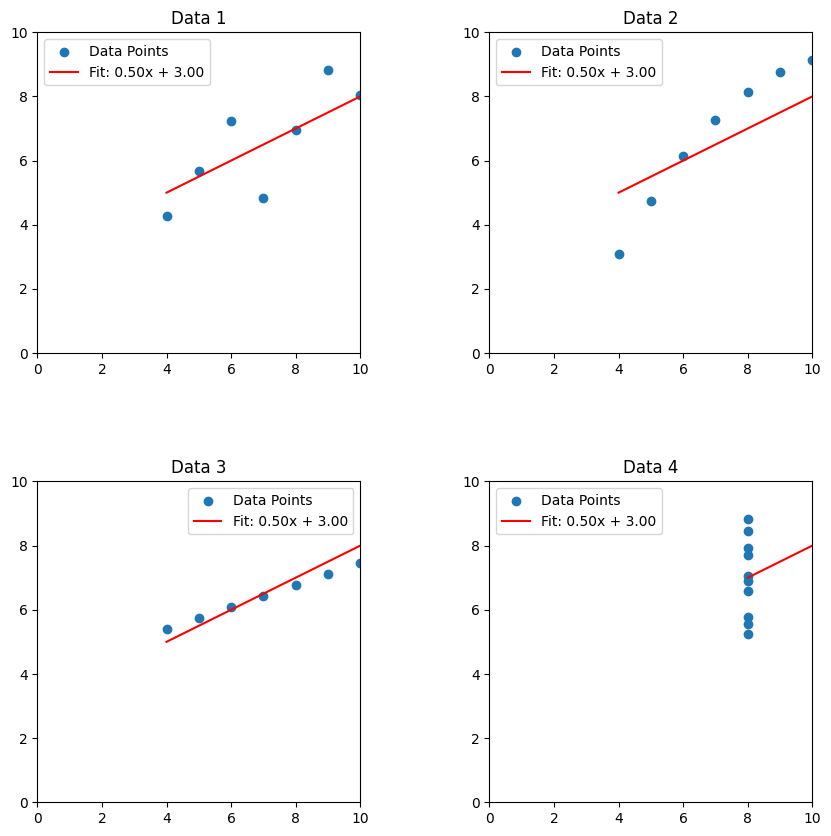

In [25]:
datasets = {
    "Data 1": data_1,
    "Data 2": data_2,
    "Data 3": data_3,
    "Data 4": data_4
}
# Setup for a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for ax, (label, data) in zip(axs.flatten(), datasets.items()):
    slope, intercept, r_value, p_value, std_err = linregress(data[:, 0], data[:, 1])
    ax.scatter(data[:, 0], data[:, 1], label='Data Points')
    x_values = np.array([min(data[:, 0]), max(data[:, 0])])
    y_values = intercept + slope * x_values
    ax.plot(x_values, y_values, 'r-', label=f'Fit: {slope:.2f}x + {intercept:.2f}')
    ax.set(title=label, xlim=(0, 10), ylim=(0, 10))
    ax.legend()
plt.show()